In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Extraction from the Files**

In [ ]:
import os
import cv2
import numpy
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
path= "/content/drive/MyDrive/Dataset"

In [ ]:
files=os.listdir(path)

In [ ]:
files_sad = [] #Appending the file names of each category in the list
files_angry = []
files_fear=[]
files_happy=[]
files_disgust=[]
files_neutral=[]

In [ ]:
for i in files:
  s = i.split('_')
  if(s[2] == 'HAP'):
    files_happy.append(i)
  
  if(s[2] == 'ANG'):
    files_angry.append(i)

  if(s[2] == 'SAD'):
    files_sad.append(i)

  if(s[2] == 'FEA'):
    files_fear.append(i)
  if(s[2] == 'DIS'):
    files_neutral.append(i)

  if(s[2] == 'NEU'):
    files_disgust.append(i)


In [ ]:
files=files_neutral[:100] + files_angry[:100] + files_sad[:100]+ files_fear[:100]+ files_happy[:100]+files_disgust[:100]

In [ ]:
len(files)

600

**Extracting Images from Videos**

In [ ]:
os.makedirs("CHECKANGRY")
os.makedirs("CHECKHAPPY")
os.makedirs("CHECKSAD")
os.makedirs("CHECKFEA")
os.makedirs("CHECKDIS")
os.makedirs("CHECKNEU")

In [ ]:
def get_frames_from_video(video_file, stride=0.25 ):
    """
    video_file - path to file, stride - i.e 1.0 - extract frame every second, 0.5 - extract every 0.5 seconds, return: list of images, list of frame times in seconds
    """
    global counter
    video = cv2.VideoCapture(video_file)
    fps = video.get(cv2.CAP_PROP_FPS) #Frames per second is being calculated
    i = 0 #strides counter
    
    while video.isOpened():
        s = video_file.split('_')
        if(s[2] == 'HAP'):
          ret, frame = video.read() #ret is Boolean(Read/Not), frame- current frame
          if ret:

            cv2.imwrite(f"CHECKHAPPY/Image{counter}.jpg", frame) 
            i += stride #increasing the stride
            video.set(1, round(i * fps)) #
            counter=counter+1

          else:
              break
       
        if(s[2] == 'ANG'):
          ret, frame = video.read() #ret is Boolean(Read/Not), frame- current frame
          if ret:
            cv2.imwrite(f"CHECKANGRY/Image{counter}.jpg", frame) 
            i += stride #increasing the stride
            video.set(1, round(i * fps)) #
            
            counter=counter+1
          else:
              break
           
        if(s[2] == 'SAD'):
          ret, frame = video.read() #ret is Boolean(Read/Not), frame- current frame
          if ret:
            cv2.imwrite(f"CHECKSAD/Image{counter}.jpg", frame) 
            i += stride #increasing the stride
            video.set(1, round(i * fps)) #
            counter=counter+1
          else:
              break
          
        if(s[2] == 'FEA'):
          ret, frame = video.read() #ret is Boolean(Read/Not), frame- current frame
          if ret:
            cv2.imwrite(f"CHECKFEA/Image{counter}.jpg", frame) 
            i += stride #increasing the stride
            video.set(1, round(i * fps)) #
            counter=counter+1
          else:
              break

        if(s[2] == 'DIS'):
          ret, frame = video.read() #ret is Boolean(Read/Not), frame- current frame
          if ret:
            cv2.imwrite(f"CHECKDIS/Image{counter}.jpg", frame) 
            i += stride #increasing the stride
            video.set(1, round(i * fps)) #
            print(counter)
            counter=counter+1
          else:
              break

        if(s[2] == 'NEU'):
          ret, frame = video.read() #ret is Boolean(Read/Not), frame- current frame
          if ret:
            cv2.imwrite(f"CHECKNEU/Image{counter}.jpg", frame) 
            i += stride #increasing the stride
            video.set(1, round(i * fps)) #
            counter=counter+1
          else:
              break

In [ ]:
counter=0

In [ ]:
for i in files:
  print(i)
  get_frames_from_video("/content/drive/MyDrive/Dataset/"+i)

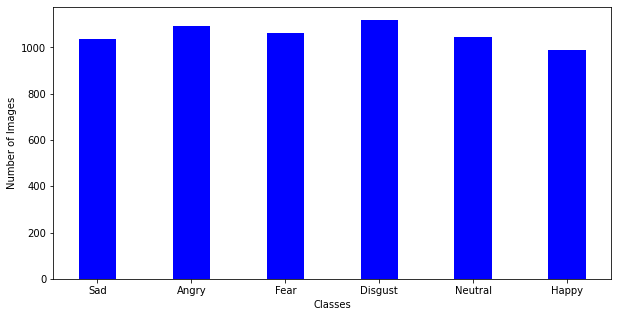

In [ ]:
fig = plt.figure(figsize = (10, 5))
classes=["Sad","Angry", "Fear", "Disgust", "Neutral", "Happy"]
values=[len(os.listdir("/content/CHECKSAD")),len(os.listdir("/content/CHECKANGRY")), len(os.listdir("/content/CHECKFEA")), len(os.listdir("/content/CHECKDIS")), len(os.listdir("/content/CHECKNEU")),  len(os.listdir("/content/CHECKHAPPY")) ]
#creating the bar plot
plt.bar(classes, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()

**Image Processing**

In [ ]:
from PIL import Image, ImageOps, ImageEnhance

In [ ]:
import tensorflow as tf

In [ ]:
#Pil Images convert ->Resize ->Sharpenning -> GreyScale -> Varad ->Numpy Array.
def convert_image(path):
  size=(75, 75)
  img = Image.open(path) 
  img = img.resize(size)
  #img = ImageOps.grayscale(img)
  enhancer = ImageEnhance.Sharpness(img)
  factor = 2
  img= enhancer.enhance(factor)
  img=tf.keras.preprocessing.image.img_to_array(img)

  return img

In [ ]:
X_images=[]

In [ ]:
for i in ["CHECKANGRY","CHECKDIS","CHECKFEA","CHECKHAPPY","CHECKNEU","CHECKSAD"]:
  for path in os.listdir(i):
    faces=convert_image("/content/"+i+"/"+path)
    X_images.append(faces)

In [ ]:
l2=len(os.listdir("/content/CHECKDIS"))
l6=len(os.listdir("/content/CHECKSAD"))
l1=len(os.listdir("/content/CHECKANGRY"))
l3=len(os.listdir("/content/CHECKFEA"))
l4=len(os.listdir("/content/CHECKHAPPY"))
l5=len(os.listdir("/content/CHECKNEU"))

In [ ]:
target_y=[]
for i in range(0,l1):
  target_y.append(0)
for i in range(l2):
  target_y.append(1)
for i in range(l3):
  target_y.append(2)
for i in range(l4):
  target_y.append(3)
for i in range(l5):
  target_y.append(4)
for i in range(l6):
  target_y.append(5)
#target_y=[]
# counter=0
# for i in [l1,l2,l3,l4,l5,l6]:
#   for t in range(i):
#     target_y.append(counter)
#   counter=counter+1

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
target_y=to_categorical(target_y)

In [ ]:
len(target_y)

6343

In [ ]:
y=np.array(target_y)

In [ ]:
y.shape

(6343, 6)

In [ ]:
X_images=np.array(X_images)

In [ ]:
X_images

In [ ]:
X_images.shape

(6343, 75, 75, 3)

**Splitting the data for the DL Model**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_images, y, random_state=42)

**Building the ResNet50**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
input_shape=(75,75,3) ## we have to explicitely tell keras the input size


pretrained_model = tf.keras.applications.resnet50.ResNet50(input_shape=input_shape, 
                                                        include_top=False, weights= 'imagenet' )

# set model weights as non trainable  
## the model can be again tested with partially trainable paramss you can use below code as needed
for l in pretrained_model.layers:
        l.trainable = False
   
## -----

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=6, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 512)               9437696   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                         

In [ ]:
eps = 20
anc=model.fit(X_train,y_train, batch_size=32, epochs=eps, validation_data=(X_test, y_test))

**Visalising the Loss Curves**

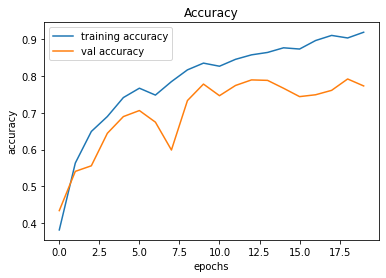

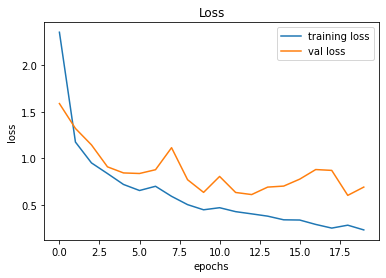

In [ ]:
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Saving & Making a Function for Predicting**

In [ ]:
model.save("Resnet50.h5")

In [ ]:
os.makedirs("Check")

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
from PIL import Image, ImageEnhance
import tensorflow as tf
import os
from statistics import mode

f_l=[]
#model = load_model("resnet_50.h5")
counter= 0

def get_frame(path,stride = 0.25):
	global f_l
	global counter
	video = cv2.VideoCapture(path)
	fps = video.get(cv2.CAP_PROP_FPS) #Frames per second is being calculated
	i = 0 #strides counter
	

	while video.isOpened():
		
		ret, frame = video.read() #ret is Boolean(Read/Not), frame- current frame

		if ret:
			i += stride #increasing the stride
			video.set(1, round(i * fps))
			f_l.append(frame)
			cv2.imwrite(f"Check/Image{counter}.jpg", frame) 
			counter= counter +1

		else:
			break

	return f_l

get_frame("/content/drive/MyDrive/Dataset/1016_TIE_FEA_XX.flv")

def convert_image(path):
	size=(75, 75)
	img = Image.open(path)
	img = img.resize(size)
	
	enhancer = ImageEnhance.Sharpness(img)
	factor = 2
	img= enhancer.enhance(factor)
	img=tf.keras.preprocessing.image.img_to_array(img)
	#print(img.shape)

	return img
X_Images=[] #list has 9 arrays
for i in os.listdir("Check"):
	x=convert_image("Check/"+i)
	#print(x.shape)
	X_Images.append(x)

arg_list=[]
labels=["ANGRY","DISGUST","FEAR","HAPPY","NEUTRAL","SAD"]
for i in X_Images:
	#print(i.shape)
	pred = model.predict(np.expand_dims(i, axis=0))[0]
	print(pred)
	arg=np.argmax(pred)
	print(arg)
	arg_list.append(arg)
print("Answer: ",labels[mode(arg_list)])


1/1 [==============================] - 0s 81ms/step
[2.3280919e-07 8.1044263e-01 1.6002077e-06 1.8955363e-01 1.9796896e-06
 2.1491346e-09]
1
1/1 [==============================] - 0s 80ms/step
[1.0897266e-08 9.9986184e-01 2.6650264e-08 1.3799105e-04 1.4810441e-07
 4.6422952e-11]
1
1/1 [==============================] - 0s 83ms/step
[1.0038964e-08 4.2620995e-03 7.4136430e-09 9.9546522e-01 2.7269332e-04
 1.1861364e-09]
3
1/1 [==============================] - 0s 83ms/step
[9.2617536e-10 9.9999595e-01 3.9960519e-06 1.8357653e-08 6.0663588e-12
 5.9758120e-14]
1
1/1 [==============================] - 0s 76ms/step
[1.5432161e-07 3.9724442e-01 8.9872437e-08 6.0269511e-01 6.0172217e-05
 2.1015858e-09]
3
1/1 [==============================] - 0s 77ms/step
[1.2069535e-07 9.7100151e-01 2.3613296e-07 2.8982308e-02 1.5857571e-05
 1.8635526e-09]
1
1/1 [==============================] - 0s 71ms/step
[1.3836152e-09 9.9992490e-01 8.4705034e-06 6.6685308e-05 1.9467483e-10
 2.8640846e-12]
1
1/1 [========